# Análisis de Aspiradoras

El Objetivo de esta Note es los siguientes:

1. Obtener información de la página de Amazon sobre aspiradoras
2. Guardar las información de las 200 primeras aspiradoras en un dataframe
3. Pasar el DataFrame y aplicarle técnicas de aprendizaje No Supervisado para clasificar las aspiradoras

## Obtener Información de Aspiradoras de Amazon

### Web Scraping

#### BeautifulSoup

Es el primer método que vamos a utilizar para poder extraer datos de la Web

In [1]:
#Líbrerias
import requests

#url = 'https://www.amazon.com/'
url = 'https://www.amazon.es/s?k=aspiradoras&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&ref=nb_sb_noss_2'

aspiradoraWeb = requests.get(url)
aspiradoraWeb.status_code

503

* El primer método de Scraping iba hacer con BeautifulSoup, sin embargo, tengo un inconveniente debido a que el status code me da 503, eso significa que no esta accesible el servidor, esto puede deberse a que hay páginas que no permiten realizar el WebScrapper por la líbreria requests

* Para resolver este caso vamos a utilizar Selenium

#### Selenium

##### 1. Configuracion y parametrización de Selenium

In [2]:
#Importamos Selenium
from selenium import webdriver

#Parametrizamos el driver
options = webdriver.ChromeOptions()
#Para navegar en modo incognito
options.add_argument('--incognito')

#Abrimos el driver
driver = webdriver.Chrome(executable_path='c:/chromedriver.exe',options=options)

#Nos vamos a la URL
driver.get(url)

##### 2. Obtener los links de cada una de las aspiradoras que se encuentran en una página y lo almaceno en una lista

In [ ]:
# Vamos a obtener los links y los nombres de las aspiradoras
aspiradoras = driver.find_elements_by_xpath('//a[@class="a-link-normal a-text-normal"]')

#Número de aspiradoras 
len(aspiradoras)

In [ ]:
#vamos a obtener los links de cada aspiradora
linksAspiradoras = []
aspiradora = aspiradoras[0]

linkAspiradora = aspiradora.get_attribute('href')
linkAspiradora

#Obtengo los links de las aspiradoras
for aspiradora in aspiradoras:
    linksAspiradoras.append(aspiradora.get_attribute('href'))
    
linksAspiradoras

In [ ]:
# Se cierra el driver
driver.close()

##### 3. Vamos a obtener la información de cada aspiradora:

    * Nombre
    * Precio
    * Número de Opiniones
    * Número de estrellas
    * Tabla de detalles técnicos

In [ ]:
# Vamos a obtener los datos de cada aspiradora
driver = webdriver.Chrome(executable_path='c:/chromedriver.exe',options=options)
# Obtengo el primer link del links de aspiradoras
driver.get(linksAspiradoras[3])

In [ ]:
#Se obtiene el nombre de la aspiradora
nombreAspiradora = driver.find_element_by_xpath('//*[@id="productTitle"]').text
#Se obtiene el número de opiniones
numeroOpinion = driver.find_element_by_xpath('//*[@id="acrCustomerReviewText"]').text
#Se obtiene el precio
precio = driver.find_element_by_xpath('//td[@class = "a-span12"]/span[contains(@id, "priceblock_")]').text
#Se obtiene el numero de estrellas
#estrella = driver.find_element_by_xpath('//i[contains(@class,"a-icon a-icon-star")]/span[@class="a-icon-alt"]').text
estrella = driver.find_element_by_xpath('//a[@class="a-popover-trigger a-declarative"]/i[contains(@class,"a-icon a-icon-star")]/span[@class="a-icon-alt"]')




print(nombreAspiradora)
print(numeroOpinion)
print(precio)
print(estrella.text)
#len(estrella)

In [ ]:
#Obteniendo la tabla de caracteristicas técnicas
#detallesTecnicos = driver.find_elements_by_xpath('//*[@id="prodDetails"]/div[2]/div[1]/div[1]/div[2]/div/div/table/tbody/tr')detallesTecnicossTecnicos = driver.find_elements_by_xpath('//')
detallesTecnicos = driver.find_elements_by_xpath('//div[@class="pdTab"]//tbody/tr')

detallesTecnicos


In [ ]:
if len(detallesTecnicos)>0:
    # Obtengo el primer detalle técnico de la table en este caso la etiqueta
    detallesTecnicos[0].find_element_by_xpath('.//td[@class="label"]').text
    # Obtengo el primer detalle técnico de la table en este caso el valor
    detallesTecnicos[0].find_element_by_xpath('.//td[@class="value"]').text

    tablaDetalleTecnico = {}

    for detalle in detallesTecnicos:
        try:
            etiqueta = detalle.find_element_by_xpath('.//td[@class="label"]').text
            valor = detalle.find_element_by_xpath('.//td[@class="value"]').text

            # El valor le paso como una lista para que sea mas fácil la conversion a Dataframe
            tablaDetalleTecnico.update({etiqueta:[valor]})
        except:
            etiqueta = ''
            valor = ''    


    tablaDetalleTecnico
else:
    tablaDetalleTecnico = {}

##### 4. Pasar a un Dataframe los datos

In [ ]:
#Mandando a un dataframe los detalles tecnicos

import pandas as pd

tablaDetalleTecnico

DatoAspiradora = pd.DataFrame(tablaDetalleTecnico)
DatoAspiradora

In [ ]:
print(nombreAspiradora)
print(numeroOpinion)
print(precio)

In [ ]:
# Vamos añadir las columnas de:
# Nombre de la aspiradora; las valoraciones; y el precio en el DataFrame
DatoAspiradora['Nombre Aspiradora'] = nombreAspiradora
DatoAspiradora['Opiniones'] = numeroOpinion
DatoAspiradora['Precio'] = precio

len(DatoAspiradora)

##### 5. Obtenemos solo los datos que necesito para el Análisis

    * Nombre de la aspiradora
    * Precio
    * Número de Opiniones
    * Peso del producto
    * Potencia
    * Dimensiones del producto
    * Volúmen

In [ ]:
#Veo las columnas que tiene el Dataframe
DatoAspiradora.columns

In [ ]:
driver.close()

##### 6. Obtener todos los datos de las 200 aspiradoras

###### Librerias

In [170]:
#Librerias
import pandas as pd
import time
from selenium import webdriver

###### Paginas en donde se encuentran las aspiradoras

In [171]:
#Todas las paginas de aspiradoras
paginaAspiradoras = [
    'https://www.amazon.es/s?k=aspiradoras&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&ref=nb_sb_noss_2',
    'https://www.amazon.es/s?k=aspiradoras&page=2&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681798&ref=sr_pg_2',
    'https://www.amazon.es/s?k=aspiradoras&page=3&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681876&ref=sr_pg_3',
    'https://www.amazon.es/s?k=aspiradoras&page=4&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681902&ref=sr_pg_4',
    'https://www.amazon.es/s?k=aspiradoras&page=5&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681936&ref=sr_pg_5',
    'https://www.amazon.es/s?k=aspiradoras&page=6&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681959&ref=sr_pg_6',
    'https://www.amazon.es/s?k=aspiradoras&page=7&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681982&ref=sr_pg_7',
    'https://www.amazon.es/s?k=aspiradoras&page=8&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583682002&ref=sr_pg_8',
    'https://www.amazon.es/s?k=aspiradoras&page=9&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583682017&ref=sr_pg_9',
    'https://www.amazon.es/s?k=aspiradoras&page=10&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583687663&ref=sr_pg_10',
    'https://www.amazon.es/s?k=aspiradoras&page=11&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583687688&ref=sr_pg_11'
]

paginaAspiradoras

['https://www.amazon.es/s?k=aspiradoras&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&ref=nb_sb_noss_2',
 'https://www.amazon.es/s?k=aspiradoras&page=2&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681798&ref=sr_pg_2',
 'https://www.amazon.es/s?k=aspiradoras&page=3&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681876&ref=sr_pg_3',
 'https://www.amazon.es/s?k=aspiradoras&page=4&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681902&ref=sr_pg_4',
 'https://www.amazon.es/s?k=aspiradoras&page=5&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681936&ref=sr_pg_5',
 'https://www.amazon.es/s?k=aspiradoras&page=6&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681959&ref=sr_pg_6',
 'https://www.amazon.es/s?k=aspiradoras&page=7&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583681982&ref=sr_pg_7',
 'https://www.amazon.es/s?k=aspiradoras&page=8&__mk_es_ES=%C3%85M%C3%85%C5%BD%C3%95%C3%91&qid=1583682002&ref=sr_pg_8',
 'https://www.amazon.es/s?k=aspiradoras&page=9&__mk_es_ES=%C3%85M

###### Función que obtiene los links de cada aspiradora por cada una de las páginas

In [176]:
# Funcion para obtener todos los links de las apiradoras pasandole la URL principla de la pagina
def obtenerLinksAspiradoras(listaPagina):
    
    linksAspiradoras = []
    
    for i, url in enumerate(listaPagina):
        
        print('Obteniendo links: {}/{}'.format(i+1,len(listaPagina)))
    
        options = webdriver.ChromeOptions()
        options.add_argument('--incognito')
        driver = webdriver.Chrome(executable_path='c:/chromedriver.exe',options=options)
        driver.get(url)
        
        # Vamos a obtener los links y los nombres de las aspiradoras
        aspiradoras = driver.find_elements_by_xpath('//a[@class="a-link-normal a-text-normal"]')
        
        #Obtengo los links de las aspiradoras
        for aspiradora in aspiradoras:
            linksAspiradoras.append(aspiradora.get_attribute('href'))
            
        driver.close()

        
    return linksAspiradoras
        
    
    

###### Función que obtiene información de cada aspiradora 

In [177]:
#Vamos a realizar un función en donde ingreso la URL de la aspiradora
# Y me devuelve un DataFrame con:
# El nombre de la aspiradora, precio,opiniones y detalles técnicos

def obtenerInformacionAspiradora(url):
    
    aspiradora = pd.DataFrame()
    tablaDetalleTecnico = {}
    
    driver = webdriver.Chrome(executable_path='c:/chromedriver.exe',options=options)
    # Obtengo el primer link del links de aspiradoras
    driver.get(url)

    #time.sleep(10)
    
    try:
    
        nombreAspiradora = driver.find_element_by_xpath('//*[@id="productTitle"]').text
        numeroOpinion = driver.find_element_by_xpath('//*[@id="acrCustomerReviewText"]').text
        precio = driver.find_element_by_xpath('//td[@class = "a-span12"]/span[contains(@id, "priceblock_")]').text
        detallesTecnicos = driver.find_elements_by_xpath('//div[@class="pdTab"]//tbody/tr')

        if len(detallesTecnicos)>0:
            # Obtengo el primer detalle técnico de la table en este caso la etiqueta
            detallesTecnicos[0].find_element_by_xpath('.//td[@class="label"]').text
            # Obtengo el primer detalle técnico de la table en este caso el valor
            detallesTecnicos[0].find_element_by_xpath('.//td[@class="value"]').text

            tablaDetalleTecnico = {}

            for detalle in detallesTecnicos:
                try:
                    etiqueta = detalle.find_element_by_xpath('.//td[@class="label"]').text
                    valor = detalle.find_element_by_xpath('.//td[@class="value"]').text

                    # El valor le paso como una lista para que sea mas fácil la conversion a Dataframe
                    tablaDetalleTecnico.update({etiqueta:[valor]})
                except:
                    etiqueta = ''
                    valor = ''    


            tablaDetalleTecnico
        else:
            tablaDetalleTecnico = {}

        DatoAspiradora = pd.DataFrame(tablaDetalleTecnico)
        DatoAspiradora['Nombre Aspiradora'] = nombreAspiradora
        DatoAspiradora['Opiniones'] = numeroOpinion
        DatoAspiradora['Precio'] = precio
        DatoAspiradora['URL'] = url
        

        aspiradora = DatoAspiradora

        driver.close()

        return aspiradora
    
    except:
        driver.close()

    
 

###### Ejecución del programa

* Obteniendo todos los links de las aspiradoras por cada página

In [178]:
# Obterner los links de las aspiradoras
links_apiradora = obtenerLinksAspiradoras(paginaAspiradoras)


Obteniendo links: 1/11
Obteniendo links: 2/11
Obteniendo links: 3/11
Obteniendo links: 4/11
Obteniendo links: 5/11
Obteniendo links: 6/11
Obteniendo links: 7/11
Obteniendo links: 8/11
Obteniendo links: 9/11
Obteniendo links: 10/11
Obteniendo links: 11/11


* Número de aspiradoras que se tiene

In [179]:
print('El numero de aspiradoras son:{}'.format(len(links_apiradora)))

El numero de aspiradoras son:236


* Obteniendo información de las aspiradoras una a una

In [180]:
# Obtiene todos los valores de las aspiradoras
datoAspiradorasX = pd.DataFrame()

for i,link in enumerate(links_apiradora):
    try:
        informacion = obtenerInformacionAspiradora(link)

        if len(informacion):
            print('Scrapeada:{}/{}'.format(i+1,len(links_apiradora)))
            datoAspiradorasX = datoAspiradorasX.append(informacion,sort=False,ignore_index=True)
        else:
            print('Sin dato de aspiradora')
            #datoAspiradorasX
    except:
        print('Hubo error en el metodo')
        
datoAspiradorasX

Scrapeada:1/236
Scrapeada:2/236
Scrapeada:3/236
Scrapeada:4/236
Scrapeada:5/236
Scrapeada:6/236
Scrapeada:7/236
Scrapeada:8/236
Scrapeada:9/236
Scrapeada:10/236
Scrapeada:11/236
Scrapeada:12/236
Scrapeada:13/236
Scrapeada:14/236
Scrapeada:15/236
Scrapeada:16/236
Scrapeada:17/236
Scrapeada:18/236
Sin dato de aspiradora
Scrapeada:20/236
Scrapeada:21/236
Scrapeada:22/236
Scrapeada:23/236
Scrapeada:24/236
Scrapeada:25/236
Scrapeada:26/236
Scrapeada:27/236
Sin dato de aspiradora
Scrapeada:29/236
Scrapeada:30/236
Scrapeada:31/236
Hubo error en el metodo
Scrapeada:33/236
Scrapeada:34/236
Scrapeada:35/236
Scrapeada:36/236
Sin dato de aspiradora
Scrapeada:38/236
Scrapeada:39/236
Sin dato de aspiradora
Scrapeada:41/236
Scrapeada:42/236
Scrapeada:43/236
Scrapeada:44/236
Scrapeada:45/236
Scrapeada:46/236
Scrapeada:47/236
Scrapeada:48/236
Scrapeada:49/236
Scrapeada:50/236
Scrapeada:51/236
Scrapeada:52/236
Scrapeada:53/236
Scrapeada:54/236
Scrapeada:55/236
Scrapeada:56/236
Scrapeada:57/236
Scrapeada

,Marca,Número de modelo,Peso del producto,Dimensiones del producto,Capacidad,Volumen,Potencia,Radio de acción,Eficiencia energética,Consumo anual,...,Salida de vapor,Tipo(s) de material,Método de instalación,Tipo de sujección de accesorio,Estilo,Amperaje,Patrón,Longitud del cable,Sistema de medida,Número de pieza del fabricante
0,AmazonBasics,15KC-71EU4,"4,5 Kg","36,3 x 29,4 x 24,7 cm",1.5 litros,1.5 litros,700 vatios,6 metros,A,23.4 kilowatt_hours_per_year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INSE,S6-EU,"2,69 Kg","34,5 x 14 x 24 cm",1.20 litros,NaN,250 vatios,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MEIYOU,NaN,"1,96 Kg",NaN,NaN,NaN,600 vatios,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rowenta,RO2727EA,"4,95 Kg","47 x 28,5 x 30 cm",1.2 litros,1.2 litros,750 vatios,12 metros,NaN,28 kilowatt_hours,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rowenta,RO3753,"6,6 Kg","40,9 x 27,6 x 29 cm",1.5 litros,1.5 litros,750 vatios,6.2 metros,NaN,28 kilowatt_hours,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Cecotec,Conga EcoExtreme 3000,"4,5 Kg",41 x 27 x 31 cm,3.5 litros,NaN,700 vatios,12 metros,A+++,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kärcher,1.629-800.0,"5,8 Kg","34 x 38,8 x 50,3 cm",17 litros,17 litros,1000 vatios,4 metros,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cecotec,05029,6 Kg,40 x 40 x 52 cm,15 litros,15 litros,1400 vatios,7 metros,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Deenkee,NaN,"3,82 Kg",NaN,600 ml,NaN,1000 vatios,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Holife,NaN,"2,16 Kg","14 x 15,5 x 64 cm",0.8 litros,0.8 litros,600 vatios,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
#Se guardan los datos de las aspiradoras
datoAspiradorasX.to_csv('DatoAspiradoras.csv');
datoAspiradorasX.to_excel('DatoAspiradoras.xlsx');

In [186]:
#Datos que se van a utilizar
datoAspiradorasX.columns

Index(['Marca', 'Número de modelo', 'Peso del producto',
       'Dimensiones del producto', 'Capacidad', 'Volumen', 'Potencia',
       'Radio de acción', 'Eficiencia energética', 'Consumo anual',
       'Nivel de limpieza en alfombra', 'Ruido', 'ASIN',
       'Valoración media de los clientes',
       'Clasificación en los más vendidos de Amazon',
       'Producto en Amazon.es desde', 'Nombre Aspiradora', 'Opiniones',
       'Precio', 'URL', 'Dimensiones del paquete', 'Color',
       'Apagado automático', 'Características especiales', 'Diámetro',
       'Voltaje', 'Material', 'Nivel de limpieza en suelo',
       'Clase de reemisión de polvo', 'Número de velocidades',
       'Tiempo de funcionamiento', 'Identificador de producto del fabricante',
       'Número de modelo del producto', 'Tamaño', 'Fuente de alimentación',
       'Potencia eléctrica', 'Número de productos', 'Número de piezas',
       'Sonido', 'Componentes incluidos', 'Incluye baterías',
       'Necesita baterías', 'Peso',

##### 7. Limpieza de Datos

In [18]:
# Cargamos el Dataset creado para no volver a correr las funciones

import pandas as pd

datosAspiradoras = pd.read_csv('DatoAspiradoras.csv')
datosAspiradoras.head()

,Unnamed: 0,Marca,Número de modelo,Peso del producto,Dimensiones del producto,Capacidad,Volumen,Potencia,Radio de acción,Eficiencia energética,...,Salida de vapor,Tipo(s) de material,Método de instalación,Tipo de sujección de accesorio,Estilo,Amperaje,Patrón,Longitud del cable,Sistema de medida,Número de pieza del fabricante
0,0,AmazonBasics,15KC-71EU4,"4,5 Kg","36,3 x 29,4 x 24,7 cm",1.5 litros,1.5 litros,700 vatios,6 metros,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,INSE,S6-EU,"2,69 Kg","34,5 x 14 x 24 cm",1.20 litros,NaN,250 vatios,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,MEIYOU,NaN,"1,96 Kg",NaN,NaN,NaN,600 vatios,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Rowenta,RO2727EA,"4,95 Kg","47 x 28,5 x 30 cm",1.2 litros,1.2 litros,750 vatios,12 metros,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Rowenta,RO3753,"6,6 Kg","40,9 x 27,6 x 29 cm",1.5 litros,1.5 litros,750 vatios,6.2 metros,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Nuevo dato de aspiradoras
aspiradoras = datosAspiradoras[['Nombre Aspiradora','Precio','Opiniones','Peso','Potencia','Dimensiones del producto','Volumen']]
aspiradoras.head()

,Nombre Aspiradora,Precio,Opiniones,Peso,Potencia,Dimensiones del producto,Volumen
0,AmazonBasics - Aspiradora cilíndrica sin bolsa...,"49,99 €",3.934 valoraciones,NaN,700 vatios,"36,3 x 29,4 x 24,7 cm",1.5 litros
1,"INSE Aspiradora Escopa sin Cable, Vertical y d...","199,00 €",49 valoraciones,NaN,250 vatios,"34,5 x 14 x 24 cm",NaN
2,"Aspiradora Escoba, MEIYOU Aspirador Mano con C...","59,96 €",354 valoraciones,NaN,600 vatios,NaN,NaN
3,Rowenta RO2727EA City Space Cyclonic Aspirador...,"59,99 €",513 valoraciones,NaN,750 vatios,"47 x 28,5 x 30 cm",1.2 litros
4,Rowenta Compact Power Cyclonic RO3753EA Aspira...,"84,99 €",5.257 valoraciones,NaN,750 vatios,"40,9 x 27,6 x 29 cm",1.5 litros


###### Arreglando el valor del precio

In [39]:
try:
    # Se quita los € por vacío
    aspiradoras["Precio"] = aspiradoras["Precio"].str.replace("€","");
    # Se reemplaza la coma por punto
    aspiradoras["Precio"] = aspiradoras["Precio"].str.replace(",",".");
    #Se convierte a float
    aspiradoras["Precio"] = aspiradoras["Precio"].astype(float);    
    
except Exception as e: 
    print(e)
    


Can only use .str accessor with string values, which use np.object_ dtype in pandas


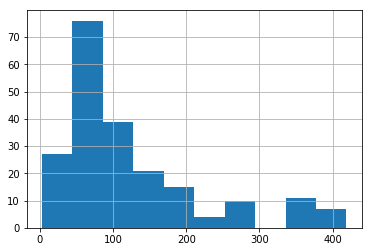

In [121]:
aspiradoras['Precio'].hist()

###### Arreglando el valoraciones

In [40]:
try:
    # Se retira el texto valoraciones
    aspiradoras['Opiniones'] = aspiradoras['Opiniones'].str.replace('valoraciones','');
    aspiradoras['Opiniones'] = aspiradoras['Opiniones'].str.replace('valoración','');
    # Se quita el punto
    aspiradoras['Opiniones'] = aspiradoras['Opiniones'].str.replace('.','');
    # Se cambia el tipo de dato a int 
    aspiradoras['Opiniones'] = aspiradoras['Opiniones'].astype(int);
    
except Exception as e: 
    print(e)
   


C:\Users\xgutierrez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\xgutierrez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\xgutierrez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to

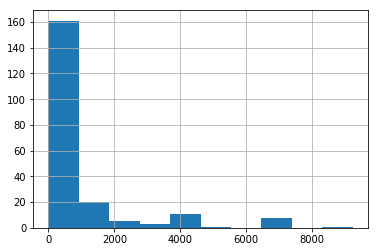

In [120]:
aspiradoras['Opiniones'].hist()

###### Arreglando el Peso

In [45]:
try:    
    aspiradoras['Peso'] = aspiradoras['Peso'].str.replace('kilogramos','')
    aspiradoras['Peso'] = aspiradoras['Peso'].astype(float)

    #Cambiando el nombre de una columna
    aspiradoras.rename(columns={'Peso':'Peso(Kg)'},inplace=True)
    
except Exception as e: 
    print(e)
   

'Peso'


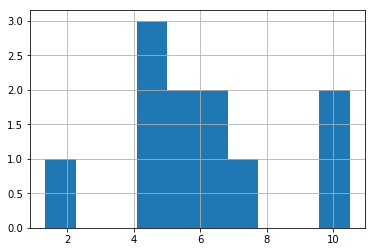

In [119]:
#Vemos la frecuencia del peso
aspiradoras['Peso(Kg)'].hist()


###### Arreglando la potencia

In [87]:
try:    
    aspiradoras['Potencia'] = aspiradoras['Potencia'].str.replace('vatios','')
    aspiradoras['Potencia'] = aspiradoras['Potencia'].str.replace('voltios','')
    aspiradoras['Potencia'] = aspiradoras['Potencia'].str.replace('100 kW','100000')
    aspiradoras['Potencia'] = aspiradoras['Potencia'].str.replace('watt_hours','')
    aspiradoras['Potencia'] = aspiradoras['Potencia'].astype(float)

    #Cambiando el nombre de una columna
    aspiradoras.rename(columns={'Potencia':'Potencia(vatios)'},inplace=True)
    
except Exception as e: 
    print(e)
   


Can only use .str accessor with string values, which use np.object_ dtype in pandas


In [90]:
# Buscando todos los registros que tienen la palabra kw
#aspiradoras[aspiradoras['Potencia'].notnull() & aspiradoras['Potencia'].str.contains('kW')]
#aspiradoras[aspiradoras['Potencia'].notnull() & aspiradoras['Potencia'].str.contains('watt_hours')]

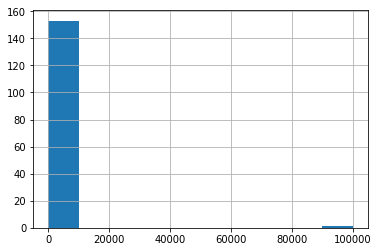

In [94]:
aspiradoras['Potencia'].hist()

Verificando la gráfica de la potencia vemos una aspiradora que tiene un valor muy alto y esto puede hacer que nos distorsione los datos, por lo cual vamos a eliminar el registro

In [108]:
#Me devuelve un True en registros que sean igual a 100000
aspiradoras.loc[:,'Potencia'] == 100000

#Me indica que registros en el dataframe tienen el valor 100000
aspiradoras[aspiradoras.loc[:,'Potencia'] == 100000]


,Nombre Aspiradora,Precio,Opiniones,Peso(Kg),Potencia,Dimensiones del producto,Volumen
127,"Aspiradora de Mano, VicTsing, 6500PA, Aspirado...",39.98,715,NaN,100000.0,"43,5 x 19 x 15,5 cm",0.6 litros


In [107]:
#Obtenemos el index de los registros
aspiradoras[aspiradoras.loc[:,'Potencia'] == 100000].index

Int64Index([127], dtype='int64')

In [114]:
#Eliminamos las filas
aspiradoras =  aspiradoras.drop(aspiradoras[aspiradoras.loc[:,'Potencia'] == 100000].index)

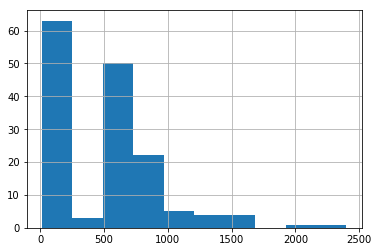

In [116]:
# Verificamos nuevamente el histograma de potencia
aspiradoras['Potencia'].hist()

##### Arreglando el volumen

In [127]:
aspiradoras['Volumen'].unique()

array(['1.5 litros', nan, '1.2 litros', '17 litros', '15 litros',
       '0.8 litros', '0.50 litros', '0.4 litros', '0.6 litros',
       '0.9 litros', '12 litros', '2 litros', '1 litros', '0.3 litros',
       '2.5 litros', '0.5 litros', '0.65 litros', '0.7 litros',
       '18.9 litros', '3.5 litros', '1.8 litros', '30 litros',
       '18.90 litros', '1.4 litros', '3 litros', '25 litros',
       '0.37 litros', '4.5 litros', '0.80 litros', '18 litros',
       '20 litros', '1.20 litros'], dtype=object)

In [128]:
try:    
    aspiradoras['Volumen'] = aspiradoras['Volumen'].str.replace('litros','')
    aspiradoras['Volumen'] = aspiradoras['Volumen'].str.replace(',','.')
    aspiradoras['Volumen'] = aspiradoras['Volumen'].astype(float)

    #Cambiando el nombre de una columna
    aspiradoras.rename(columns={'Volumen':'Volumen(litros)'},inplace=True)
    
except Exception as e: 
    print(e)
   

In [131]:
print(aspiradoras.describe())
print(aspiradoras.info())

           Precio    Opiniones   Peso(Kg)     Potencia  Volumen(litros)
count  210.000000   210.000000  11.000000   153.000000       118.000000
mean   122.238619   953.876190   6.098182   531.557516         4.559492
std     97.328747  1679.692836   2.620972   419.021764         7.752133
min      2.820000     1.000000   1.340000    15.500000         0.300000
25%     55.867500    65.250000   4.700000   150.000000         0.600000
50%     87.660000   305.000000   5.600000   560.000000         1.200000
75%    153.342500   822.000000   6.960000   700.000000         2.875000
max    419.000000  9231.000000  10.500000  2400.000000        30.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 210
Data columns (total 7 columns):
Nombre Aspiradora           210 non-null object
Precio                      210 non-null float64
Opiniones                   210 non-null int32
Peso(Kg)                    11 non-null float64
Potencia                    153 non-null float64
Dimensi

##### Arreglado las dimensiones del producto

In [132]:
aspiradoras.head()

,Nombre Aspiradora,Precio,Opiniones,Peso(Kg),Potencia,Dimensiones del producto,Volumen(litros)
0,AmazonBasics - Aspiradora cilíndrica sin bolsa...,49.99,3934,NaN,700.0,"36,3 x 29,4 x 24,7 cm",1.5
1,"INSE Aspiradora Escopa sin Cable, Vertical y d...",199.00,49,NaN,250.0,"34,5 x 14 x 24 cm",NaN
2,"Aspiradora Escoba, MEIYOU Aspirador Mano con C...",59.96,354,NaN,600.0,NaN,NaN
3,Rowenta RO2727EA City Space Cyclonic Aspirador...,59.99,513,NaN,750.0,"47 x 28,5 x 30 cm",1.2
4,Rowenta Compact Power Cyclonic RO3753EA Aspira...,84.99,5257,NaN,750.0,"40,9 x 27,6 x 29 cm",1.5


In [133]:
#Retiramos el texto de los cm

aspiradoras['Dimensiones del producto'] = aspiradoras['Dimensiones del producto'].str.replace('cm','')

In [134]:
aspiradoras.head()

,Nombre Aspiradora,Precio,Opiniones,Peso(Kg),Potencia,Dimensiones del producto,Volumen(litros)
0,AmazonBasics - Aspiradora cilíndrica sin bolsa...,49.99,3934,NaN,700.0,"36,3 x 29,4 x 24,7",1.5
1,"INSE Aspiradora Escopa sin Cable, Vertical y d...",199.00,49,NaN,250.0,"34,5 x 14 x 24",NaN
2,"Aspiradora Escoba, MEIYOU Aspirador Mano con C...",59.96,354,NaN,600.0,NaN,NaN
3,Rowenta RO2727EA City Space Cyclonic Aspirador...,59.99,513,NaN,750.0,"47 x 28,5 x 30",1.2
4,Rowenta Compact Power Cyclonic RO3753EA Aspira...,84.99,5257,NaN,750.0,"40,9 x 27,6 x 29",1.5


In [150]:
# Vamos a dividir la dimensión del producto en Largo, Ancho y profundidad
aspiradoras[['Largo(cm)','Ancho(cm)','Profundidad(cm)']] = aspiradoras['Dimensiones del producto'].str.split('x',expand = True)

aspiradoras.head()

,Nombre Aspiradora,Precio,Opiniones,Peso(Kg),Potencia,Dimensiones del producto,Volumen(litros),Largo(cm),Ancho(cm),Profundidad(cm)
0,AmazonBasics - Aspiradora cilíndrica sin bolsa...,49.99,3934,NaN,700.0,"36,3 x 29,4 x 24,7",1.5,"36,3","29,4","24,7"
1,"INSE Aspiradora Escopa sin Cable, Vertical y d...",199.00,49,NaN,250.0,"34,5 x 14 x 24",NaN,"34,5",14,24
2,"Aspiradora Escoba, MEIYOU Aspirador Mano con C...",59.96,354,NaN,600.0,NaN,NaN,NaN,NaN,NaN
3,Rowenta RO2727EA City Space Cyclonic Aspirador...,59.99,513,NaN,750.0,"47 x 28,5 x 30",1.2,47,"28,5",30
4,Rowenta Compact Power Cyclonic RO3753EA Aspira...,84.99,5257,NaN,750.0,"40,9 x 27,6 x 29",1.5,"40,9","27,6",29


In [152]:
# Cambio de comas por punto
aspiradoras['Largo(cm)'] = aspiradoras['Largo(cm)'].str.replace(',','.')
aspiradoras['Ancho(cm)'] = aspiradoras['Ancho(cm)'].str.replace(',','.')
aspiradoras['Profundidad(cm)'] = aspiradoras['Profundidad(cm)'].str.replace(',','.')

In [153]:
aspiradoras.head()

,Nombre Aspiradora,Precio,Opiniones,Peso(Kg),Potencia,Dimensiones del producto,Volumen(litros),Largo(cm),Ancho(cm),Profundidad(cm)
0,AmazonBasics - Aspiradora cilíndrica sin bolsa...,49.99,3934,NaN,700.0,"36,3 x 29,4 x 24,7",1.5,36.3,29.4,24.7
1,"INSE Aspiradora Escopa sin Cable, Vertical y d...",199.00,49,NaN,250.0,"34,5 x 14 x 24",NaN,34.5,14,24
2,"Aspiradora Escoba, MEIYOU Aspirador Mano con C...",59.96,354,NaN,600.0,NaN,NaN,NaN,NaN,NaN
3,Rowenta RO2727EA City Space Cyclonic Aspirador...,59.99,513,NaN,750.0,"47 x 28,5 x 30",1.2,47,28.5,30
4,Rowenta Compact Power Cyclonic RO3753EA Aspira...,84.99,5257,NaN,750.0,"40,9 x 27,6 x 29",1.5,40.9,27.6,29


In [154]:
#Cambio de tipo de Dato
aspiradoras['Largo(cm)'] = aspiradoras['Largo(cm)'].astype(float)
aspiradoras['Ancho(cm)'] = aspiradoras['Ancho(cm)'].astype(float)
aspiradoras['Profundidad(cm)'] = aspiradoras['Profundidad(cm)'].astype(float)

In [155]:
print(aspiradoras.describe())
print(aspiradoras.info())

           Precio    Opiniones   Peso(Kg)     Potencia  Volumen(litros)  \
count  210.000000   210.000000  11.000000   153.000000       118.000000   
mean   122.238619   953.876190   6.098182   531.557516         4.559492   
std     97.328747  1679.692836   2.620972   419.021764         7.752133   
min      2.820000     1.000000   1.340000    15.500000         0.300000   
25%     55.867500    65.250000   4.700000   150.000000         0.600000   
50%     87.660000   305.000000   5.600000   560.000000         1.200000   
75%    153.342500   822.000000   6.960000   700.000000         2.875000   
max    419.000000  9231.000000  10.500000  2400.000000        30.000000   

        Largo(cm)   Ancho(cm)  Profundidad(cm)  
count  161.000000  161.000000       161.000000  
mean    36.934161   27.881988        56.355851  
std     18.999023    9.760129        39.648230  
min      1.100000    3.400000         1.092000  
25%     25.000000   24.000000        24.700000  
50%     34.500000   28.000000 

In [156]:
aspiradoras.head()

,Nombre Aspiradora,Precio,Opiniones,Peso(Kg),Potencia,Dimensiones del producto,Volumen(litros),Largo(cm),Ancho(cm),Profundidad(cm)
0,AmazonBasics - Aspiradora cilíndrica sin bolsa...,49.99,3934,NaN,700.0,"36,3 x 29,4 x 24,7",1.5,36.3,29.4,24.7
1,"INSE Aspiradora Escopa sin Cable, Vertical y d...",199.00,49,NaN,250.0,"34,5 x 14 x 24",NaN,34.5,14.0,24.0
2,"Aspiradora Escoba, MEIYOU Aspirador Mano con C...",59.96,354,NaN,600.0,NaN,NaN,NaN,NaN,NaN
3,Rowenta RO2727EA City Space Cyclonic Aspirador...,59.99,513,NaN,750.0,"47 x 28,5 x 30",1.2,47.0,28.5,30.0
4,Rowenta Compact Power Cyclonic RO3753EA Aspira...,84.99,5257,NaN,750.0,"40,9 x 27,6 x 29",1.5,40.9,27.6,29.0


##### Reemplazando valore NaN

En esta parte vamos a reemplazar los valores en nulo por el promedio de cada uno de las columnas

In [173]:
#Vamos a ver si el DataFrame tiene nulos
aspiradoras.isnull().values.any()

True

In [174]:
#Vamos a ver en que columnas tengo los nulos
aspiradoras.isnull().any()

Nombre Aspiradora           False
Precio                      False
Opiniones                   False
Peso(Kg)                     True
Potencia                     True
Dimensiones del producto     True
Volumen(litros)              True
Largo(cm)                    True
Ancho(cm)                    True
Profundidad(cm)              True
dtype: bool

In [176]:
#Vamos a ver cuantos valores nulos tengo por columna
aspiradoras.isnull().sum()

Nombre Aspiradora             0
Precio                        0
Opiniones                     0
Peso(Kg)                    199
Potencia                     57
Dimensiones del producto     49
Volumen(litros)              92
Largo(cm)                    49
Ancho(cm)                    49
Profundidad(cm)              49
dtype: int64

In [180]:
#Obtengo la media de las columnas
aspiradoras.mean()

Precio             122.238619
Opiniones          953.876190
Peso(Kg)             6.098182
Potencia           531.557516
Volumen(litros)      4.559492
Largo(cm)           36.934161
Ancho(cm)           27.881988
Profundidad(cm)     56.355851
dtype: float64

In [184]:
# Reemplazar la media en todos los Nan
aspiradoras = aspiradoras.fillna(aspiradoras.mean())
aspiradoras.head()

,Nombre Aspiradora,Precio,Opiniones,Peso(Kg),Potencia,Dimensiones del producto,Volumen(litros),Largo(cm),Ancho(cm),Profundidad(cm)
0,AmazonBasics - Aspiradora cilíndrica sin bolsa...,49.99,3934,6.098182,700.0,"36,3 x 29,4 x 24,7",1.500000,36.300000,29.400000,24.700000
1,"INSE Aspiradora Escopa sin Cable, Vertical y d...",199.00,49,6.098182,250.0,"34,5 x 14 x 24",4.559492,34.500000,14.000000,24.000000
2,"Aspiradora Escoba, MEIYOU Aspirador Mano con C...",59.96,354,6.098182,600.0,NaN,4.559492,36.934161,27.881988,56.355851
3,Rowenta RO2727EA City Space Cyclonic Aspirador...,59.99,513,6.098182,750.0,"47 x 28,5 x 30",1.200000,47.000000,28.500000,30.000000
4,Rowenta Compact Power Cyclonic RO3753EA Aspira...,84.99,5257,6.098182,750.0,"40,9 x 27,6 x 29",1.500000,40.900000,27.600000,29.000000


In [186]:
aspiradoras['Dimension Volumetrica'] = aspiradoras['Largo(cm)']*aspiradoras['Ancho(cm)']*aspiradoras['Profundidad(cm)']
aspiradoras.head()

,Nombre Aspiradora,Precio,Opiniones,Peso(Kg),Potencia,Dimensiones del producto,Volumen(litros),Largo(cm),Ancho(cm),Profundidad(cm),Dimension Volumetrica
0,AmazonBasics - Aspiradora cilíndrica sin bolsa...,49.99,3934,6.098182,700.0,"36,3 x 29,4 x 24,7",1.500000,36.300000,29.400000,24.700000,26360.334000
1,"INSE Aspiradora Escopa sin Cable, Vertical y d...",199.00,49,6.098182,250.0,"34,5 x 14 x 24",4.559492,34.500000,14.000000,24.000000,11592.000000
2,"Aspiradora Escoba, MEIYOU Aspirador Mano con C...",59.96,354,6.098182,600.0,NaN,4.559492,36.934161,27.881988,56.355851,58035.133103
3,Rowenta RO2727EA City Space Cyclonic Aspirador...,59.99,513,6.098182,750.0,"47 x 28,5 x 30",1.200000,47.000000,28.500000,30.000000,40185.000000
4,Rowenta Compact Power Cyclonic RO3753EA Aspira...,84.99,5257,6.098182,750.0,"40,9 x 27,6 x 29",1.500000,40.900000,27.600000,29.000000,32736.360000


In [188]:
#Eliminamos las columnas de Dimensión del producto que ya no la requiero
aspiradoras = aspiradoras.drop(['Dimensiones del producto'],axis=1)

aspiradoras.head()

,Nombre Aspiradora,Precio,Opiniones,Peso(Kg),Potencia,Volumen(litros),Largo(cm),Ancho(cm),Profundidad(cm),Dimension Volumetrica
0,AmazonBasics - Aspiradora cilíndrica sin bolsa...,49.99,3934,6.098182,700.0,1.500000,36.300000,29.400000,24.700000,26360.334000
1,"INSE Aspiradora Escopa sin Cable, Vertical y d...",199.00,49,6.098182,250.0,4.559492,34.500000,14.000000,24.000000,11592.000000
2,"Aspiradora Escoba, MEIYOU Aspirador Mano con C...",59.96,354,6.098182,600.0,4.559492,36.934161,27.881988,56.355851,58035.133103
3,Rowenta RO2727EA City Space Cyclonic Aspirador...,59.99,513,6.098182,750.0,1.200000,47.000000,28.500000,30.000000,40185.000000
4,Rowenta Compact Power Cyclonic RO3753EA Aspira...,84.99,5257,6.098182,750.0,1.500000,40.900000,27.600000,29.000000,32736.360000


In [189]:
#Vamos a comprobar que ya no hay nulos
aspiradoras.isnull().sum()

Nombre Aspiradora        0
Precio                   0
Opiniones                0
Peso(Kg)                 0
Potencia                 0
Volumen(litros)          0
Largo(cm)                0
Ancho(cm)                0
Profundidad(cm)          0
Dimension Volumetrica    0
dtype: int64

In [193]:
aspiradoras.corr()

,Precio,Opiniones,Peso(Kg),Potencia,Volumen(litros),Largo(cm),Ancho(cm),Profundidad(cm),Dimension Volumetrica
Precio,1.000000,-0.157352,5.822340e-02,-1.090242e-01,-0.000921,-0.124887,0.202877,0.563607,0.508017
Opiniones,-0.157352,1.000000,-2.270903e-02,-1.156796e-01,-0.175881,-0.160688,0.051809,0.109786,-0.064164
Peso(Kg),0.058223,-0.022709,1.000000e+00,-4.579719e-30,0.257479,-0.003333,-0.030600,0.025990,-0.009962
Potencia,-0.109024,-0.115680,-4.579719e-30,1.000000e+00,0.192323,-0.018191,0.199852,-0.171073,-0.080467
Volumen(litros),-0.000921,-0.175881,2.574789e-01,1.923227e-01,1.000000,-0.003516,0.252060,0.002030,0.276201
Largo(cm),-0.124887,-0.160688,-3.333196e-03,-1.819113e-02,-0.003516,1.000000,0.031957,-0.434731,0.042449
Ancho(cm),0.202877,0.051809,-3.059988e-02,1.998525e-01,0.252060,0.031957,1.000000,0.041853,0.464014
Profundidad(cm),0.563607,0.109786,2.599036e-02,-1.710729e-01,0.002030,-0.434731,0.041853,1.000000,0.666699
Dimension Volumetrica,0.508017,-0.064164,-9.961686e-03,-8.046695e-02,0.276201,0.042449,0.464014,0.666699,1.000000


### Aprendizaje No Supervisado K-Means

K-Means me permite agrupar en clusters los datos

#### Determinar cuantos cluster son lo recomendado

Para esto se va ocupar el **Método de ElBow** el cual nos permite determinar cuál es el número de clusters óptimos para nuestra clasificación

In [198]:
# Líbrerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [202]:
datos = aspiradoras.drop(['Nombre Aspiradora'],axis=1)
datos.head()

,Precio,Opiniones,Peso(Kg),Potencia,Volumen(litros),Largo(cm),Ancho(cm),Profundidad(cm),Dimension Volumetrica
0,49.99,3934,6.098182,700.0,1.500000,36.300000,29.400000,24.700000,26360.334000
1,199.00,49,6.098182,250.0,4.559492,34.500000,14.000000,24.000000,11592.000000
2,59.96,354,6.098182,600.0,4.559492,36.934161,27.881988,56.355851,58035.133103
3,59.99,513,6.098182,750.0,1.200000,47.000000,28.500000,30.000000,40185.000000
4,84.99,5257,6.098182,750.0,1.500000,40.900000,27.600000,29.000000,32736.360000


In [203]:
distorcion = []

#Le damos unos valores de K
K = range(1,20)

#Vamos a interactuar con KMeans por 20 veces
for k in K:
    modeloKMeans = KMeans(n_clusters = k)
    modeloKMeans.fit(datos)
    distorcion.append(modeloKMeans.inertia_)


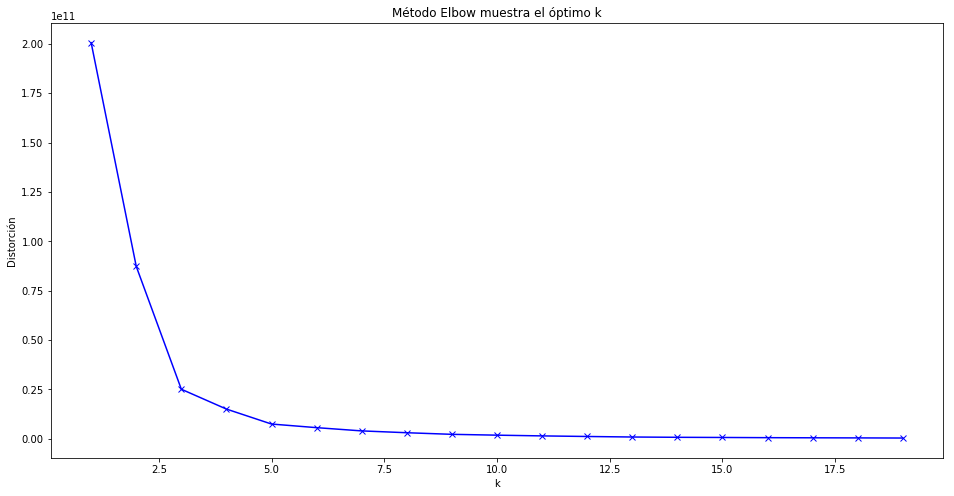

In [208]:
#Gráficando

plt.figure(figsize=(16,8))
plt.plot(K,distorcion,'bx-')
plt.xlabel('k')
plt.ylabel('Distorción')
plt.title('Método Elbow muestra el óptimo k')
plt.show()